## **1. Import Required Libraries**

<hr style="border: 1px solid red;">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from collections import Counter

# Set visualization theme
sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams['figure.figsize'] = (12, 8)

<hr style="border: 1px solid red;">

## **2. Mount Google Drive and Load Data**

<hr style="border: 1px solid red;">

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***

In [3]:
import os
supply_chain_path = '/content/drive/My Drive/supply_chain'
print(os.listdir(supply_chain_path))

['DescriptionDataCoSupplyChain.csv', 'tokenized_access_logs.csv', 'DataCoSupplyChainDataset.csv', 'supply_chain_data_cleaned.csv']


***

In [4]:
df = pd.read_csv('/content/drive/My Drive/supply_chain/supply_chain_data_cleaned.csv', encoding='latin-1')

<hr style="border: 1px solid red;">

## **3. Explore Geographic Columns**
***
Examine the available geographic information to understand what geographic analysis we can perform.
***
<hr style="border: 1px solid red;">

In [5]:
# Examine geographic columns
geographic_columns = [col for col in df.columns if any(geo_term in col.lower()
                     for geo_term in ['country', 'city', 'state', 'region', 'latitude', 'longitude'])]

print("Available Geographic Columns:")
for col in geographic_columns:
    print(f"- {col}: {df[col].nunique()} unique values")

print(f"\nDataset shape: {df.shape}")
df[geographic_columns].head()

Available Geographic Columns:
- Customer City: 562 unique values
- Customer Country: 2 unique values
- Customer State: 44 unique values
- Latitude: 11247 unique values
- Longitude: 4485 unique values
- Order City: 3597 unique values
- Order Country: 164 unique values
- Order Region: 23 unique values
- Order State: 1089 unique values

Dataset shape: (180508, 45)


,Customer City,Customer Country,Customer State,Latitude,Longitude,Order City,Order Country,Order Region,Order State
0,Caguas,Puerto Rico,PR,18.251453,-66.037056,Bekasi,Indonesia,Southeast Asia,Java Occidental
1,Caguas,Puerto Rico,PR,18.279451,-66.037064,Bikaner,India,South Asia,RajastÃ¡n
2,San Jose,EE. UU.,CA,37.292233,-121.881279,Bikaner,India,South Asia,RajastÃ¡n
3,Los Angeles,EE. UU.,CA,34.125946,-118.291016,Townsville,Australia,Oceania,Queensland
4,Caguas,Puerto Rico,PR,18.253769,-66.037048,Townsville,Australia,Oceania,Queensland


<hr style="border: 1px solid red;">

## **4. Geographic Data Quality Assessment**
***
Before analysis, we check for missing values, inconsistencies, and data quality issues in our geographic fields.
***
<hr style="border: 1px solid red;">

In [6]:
# Check for missing values in geographic columns
print("Missing Values in Geographic Columns:")
for col in geographic_columns:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    print(f"{col}: {missing_count} ({missing_pct:.2f}%)")

# Look at unique values for key geographic fields
print(f"\nTop Customer Countries: {df['Customer Country'].value_counts().head()}")
print(f"\nTop Customer States: {df['Customer State'].value_counts().head()}")

Missing Values in Geographic Columns:
Customer City: 0 (0.00%)
Customer Country: 0 (0.00%)
Customer State: 0 (0.00%)
Latitude: 0 (0.00%)
Longitude: 0 (0.00%)
Order City: 0 (0.00%)
Order Country: 0 (0.00%)
Order Region: 0 (0.00%)
Order State: 0 (0.00%)

Top Customer Countries: Customer Country
EE. UU.        111137
Puerto Rico     69371
Name: count, dtype: int64

Top Customer States: Customer State
PR    69371
CA    29221
NY    11327
TX     9102
IL     7630
Name: count, dtype: int64


<hr style="border: 1px solid red;">


## **5. Sales Performance by Country**
***
Analyze total sales, orders, and average order value across different countries to identify top-performing markets and expansion opportunities.
***
<hr style="border: 1px solid red;">

In [7]:
# Aggregate sales data by country
country_performance = df.groupby('Customer Country').agg({
    'Sales': ['sum', 'mean'],
    'Order Id': 'nunique',
    'Benefit per order': 'sum',
    'Customer Id': 'nunique'
}).round(2)

# Flatten column names
country_performance.columns = ['Total_Sales', 'Avg_Order_Value', 'Total_Orders', 'Total_Benefit', 'Unique_Customers']
country_performance = country_performance.reset_index().sort_values('Total_Sales', ascending=False)

# Display top 10 countries
print("Top 10 Countries by Sales Performance:")
print(country_performance.head(10))

Top 10 Countries by Sales Performance:
  Customer Country  Total_Sales  Avg_Order_Value  Total_Orders  Total_Benefit  \
0          EE. UU.  22631633.27           203.64         40431     2452826.85   
1      Puerto Rico  14149668.85           203.97         25310     1513216.07   

   Unique_Customers  
0             12710  
1              7931  


<hr style="border: 1px solid red;">

## **6: State-Level Analysis**
***
Bar chart to showcase the top 10 states by total sales.
***
<hr style="border: 1px solid red;">

In [17]:
# State-level sales and order statistics
state_performance = df.groupby('Customer State').agg({
    'Sales': 'sum',
    'Order Id': 'nunique',
    'Benefit per order': 'sum',
    'Customer Id': 'nunique'
}).round(2)

state_performance = state_performance.reset_index().rename(columns={
    'Sales': 'Total_Sales',
    'Order Id': 'Total_Orders',
    'Benefit per order': 'Total_Benefit',
    'Customer Id': 'Unique_Customers'
}).sort_values('Total_Sales', ascending=False)

# Display top 10 states
print("Top 10 States by Sales Performance:")
print(state_performance.head(10))

Top 10 States by Sales Performance:
   Customer State  Total_Sales  Total_Orders  Total_Benefit  Unique_Customers
34             PR  14149668.85         25310     1513216.07              7931
3              CA   5928356.71         10596      640654.59              3316
29             NY   2301325.15          4104      239429.93              1278
38             TX   1869493.22          3317      199370.29              1087
13             IL   1561183.05          2733      179835.32               854
8              FL   1110758.41          1963      136256.96               583
30             OH    833180.86          1484       84621.71               465
20             MI    782401.32          1376       81339.50               427
33             PA    772199.01          1384       78245.07               426
26             NJ    654152.54          1191       67470.03               381


***

/tmp/ipython-input-3921962390.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, y='Customer State', x='Total_Sales', palette='Blues_r')


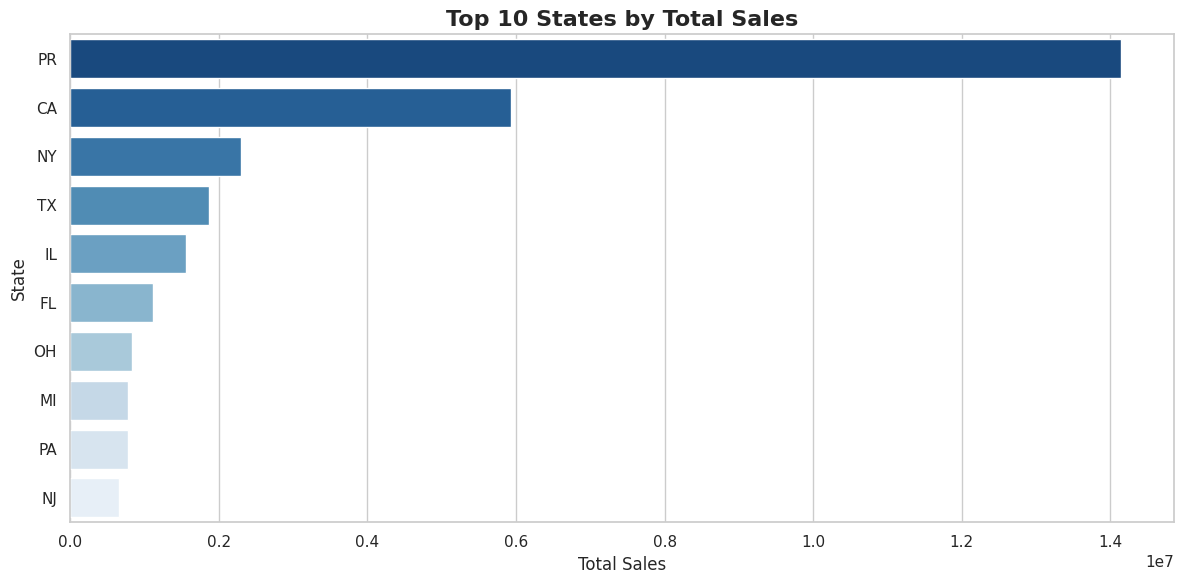

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

top_states = state_performance.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_states, y='Customer State', x='Total_Sales', palette='Blues_r')
plt.title('Top 10 States by Total Sales', fontsize=16, weight='bold')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <ul>
    <li><strong>Top State:</strong> <strong>PR (Puerto Rico)</strong> alone generated <strong>$14.15M</strong> in sales, far outpacing any individual U.S. state, confirming Puerto Rico as a concentrated, high-value market.</li>
    <li>The largest U.S. states by sales are:
      <ul>
        <li><strong>CA (California):</strong> $5.93M sales, 10,596 orders, 3,316 customers</li>
        <li><strong>NY (New York):</strong> $2.30M sales, 4,104 orders, 1,278 customers</li>
        <li><strong>TX (Texas), IL (Illinois), FL (Florida)</strong> follow</li>
      </ul>
    </li>
    <li><strong>Insight:</strong><br/>Puerto Rico alone is the sales powerhouse, but key states like CA, NY, TX, and IL also anchor national revenue. The distribution is heavily skewed: Puerto Rico is as vital as all top U.S. states combined.</li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid red;">

## **7. City-Level Analysis**
***
Next, we drill down to city-level sales to identify key urban markets driving performance.
***
<hr style="border: 1px solid red;">

In [19]:
city_performance = df.groupby('Customer City').agg({
    'Sales': 'sum',
    'Order Id': 'nunique',
    'Benefit per order': 'sum',
    'Customer Id': 'nunique'
}).round(2)

city_performance = city_performance.reset_index().rename(columns={
    'Sales': 'Total_Sales',
    'Order Id': 'Total_Orders',
    'Benefit per order': 'Total_Benefit',
    'Customer Id': 'Unique_Customers'
}).sort_values('Total_Sales', ascending=False)

# Display top 10 cities
print("Top 10 Cities by Sales Performance:")
print(city_performance.head(10))

Top 10 Cities by Sales Performance:
    Customer City  Total_Sales  Total_Orders  Total_Benefit  Unique_Customers
65         Caguas  13609693.29         24363     1450346.27              7650
87        Chicago    797614.21          1387       85725.92               435
284   Los Angeles    697425.94          1247       80432.38               392
59       Brooklyn    676419.78          1250       67231.87               375
347      New York    361217.10           640       39302.14               194
390  Philadelphia    315705.51           563       30163.09               164
58          Bronx    308905.01           538       40944.77               173
449     San Diego    293830.52           499       26133.64               154
317         Miami    270368.20           474       35480.25               138
225       Houston    267347.92           479       30684.53               148


***

/tmp/ipython-input-1182337677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, y='Customer City', x='Total_Sales', palette='Greens_r')


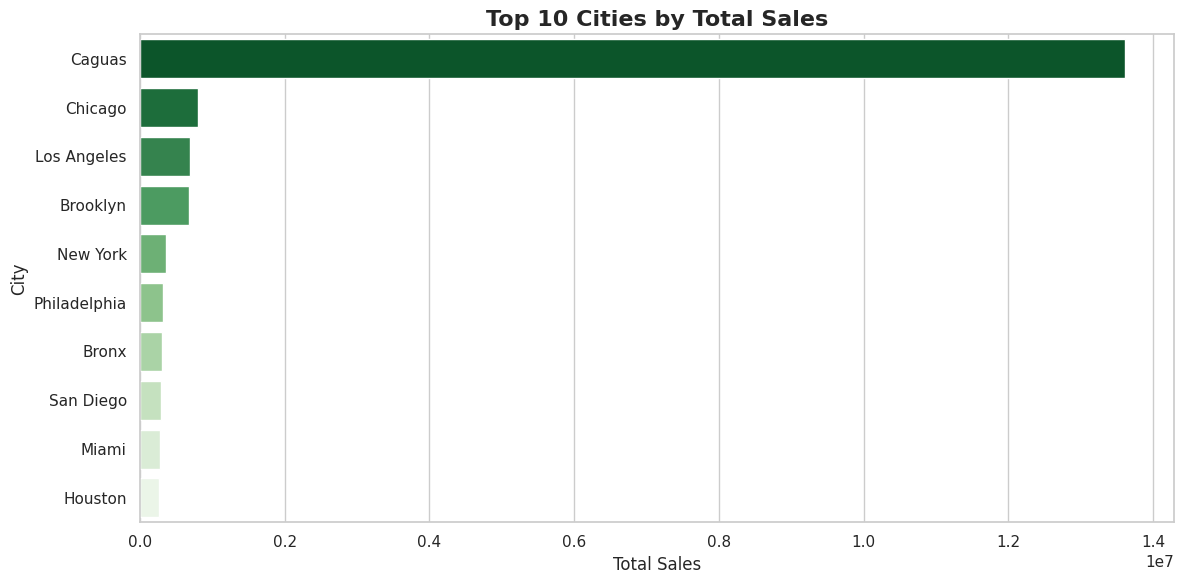

In [20]:
top_cities = city_performance.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_cities, y='Customer City', x='Total_Sales', palette='Greens_r')
plt.title('Top 10 Cities by Total Sales', fontsize=16, weight='bold')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <ul>
    <li><strong>Top City:</strong> <strong>Caguas</strong> (Puerto Rico) is a true outlier with <strong>$13.6M</strong> in sales—more than 60% of Puerto Rico’s—and 24,363 orders from 7,650 customers.</li>
    <li>Top U.S. cities include:
      <ul>
        <li><strong>Chicago:</strong> $797K sales, 1,387 orders</li>
        <li><strong>Los Angeles:</strong> $697K sales, 1,247 orders</li>
        <li><strong>Brooklyn, New York, Philadelphia, Bronx</strong> also appear as major urban contributors</li>
      </ul>
    </li>
    <li><strong>Insight:</strong><br/>Caguas overwhelmingly dominates city sales, likely reflecting either a major distribution center, a key reseller, or a set of high-volume customers in that region. U.S. city sales are distributed among several major metros, indicating a broader but less concentrated market footprint.</li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid red;">

## **8. Geographic Delivery Performance**
***
Measure on-time delivery rates at the state level to reveal regional logistics strengths and weaknesses.
***
<hr style="border: 1px solid red;">

/tmp/ipython-input-2295623565.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_delivery_states, y='Customer State', x='OnTimeRatePct', palette='RdYlGn')


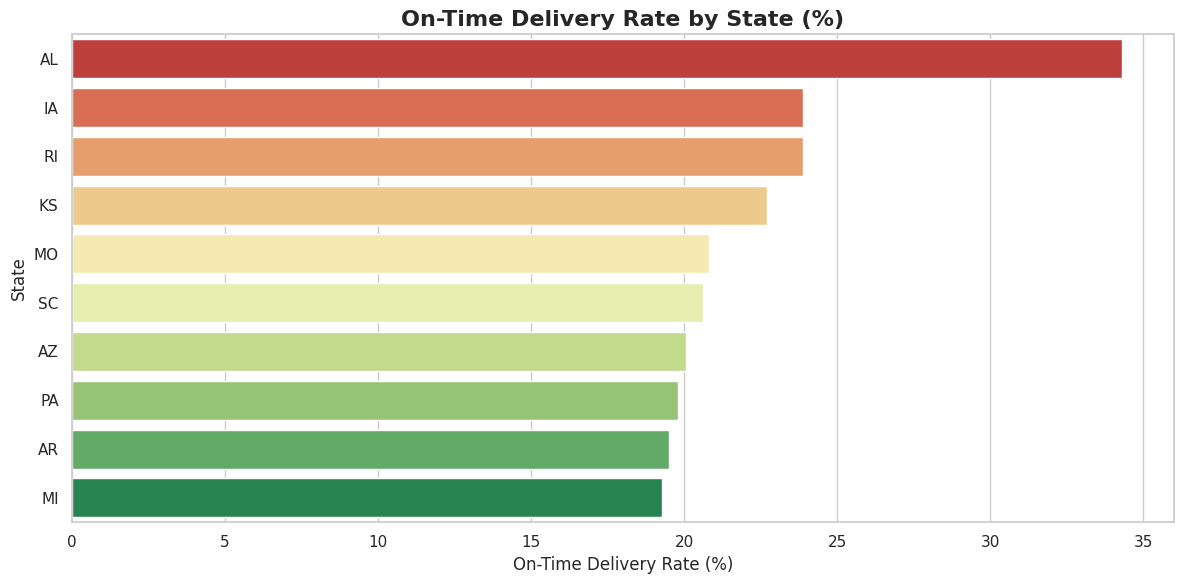

In [22]:
df['OnTime'] = df['Delivery Status'].str.contains('on time', case=False, na=False)

delivery_performance = (
    df.groupby('Customer State')
    .agg(OnTimeRate=('OnTime', 'mean'))
    .reset_index()
)
delivery_performance['OnTimeRatePct'] = delivery_performance['OnTimeRate'] * 100

top_delivery_states = delivery_performance.sort_values('OnTimeRatePct', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_delivery_states, y='Customer State', x='OnTimeRatePct', palette='RdYlGn')
plt.title('On-Time Delivery Rate by State (%)', fontsize=16, weight='bold')
plt.xlabel('On-Time Delivery Rate (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


<hr style="border: 1px solid red;">